In [83]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [88]:
df = pd.read_parquet("training_data.parquet")
df_test = pd.read_parquet("test_data.parquet")

In [89]:
df.head()

,target,text,text_len,tokenized_text
1307018,4,@LaMamaNaturale - they have outhouses that can...,74,"[outhouse, used, purpose]"
1004419,4,@almightyvickyv Because curry is the best EVER...,50,"[curry, best, ever]"
788888,0,Morning All... I think Gmail has abandoned th...,127,"[morning, think, gmail, abandoned, sm, text, m..."
963563,4,@garymoneysmith It was a good morning. Defini...,91,"[good, morning, definitely, foundation, build,..."
191483,0,Dear twitter world. Those taco nachos are not ...,123,"[dear, twitter, world, taco, nacho, good, soun..."


In [90]:
df_test.head()

,target,text,text_len,tokenized_text
1454731,4,@luckeyme Thanks Tim - it's pretty similar to ...,94,"[thanks, tim, pretty, similar, looking, started]"
993437,4,eat you DINNER guys..,22,"[eat, dinner, guy]"
530154,0,@queenofpr Its no problem. Give me a call when...,121,"[problem, give, call, get, chance, way, sorry,..."
373575,0,My little boo is sick,22,"[little, boo, sick]"
866790,4,2 hours of jogging ... cant feel my legs ... b...,65,"[2, hour, jogging, cant, feel, leg, dam, feel,..."


<AxesSubplot:xlabel='tokenized_text', ylabel='Count'>

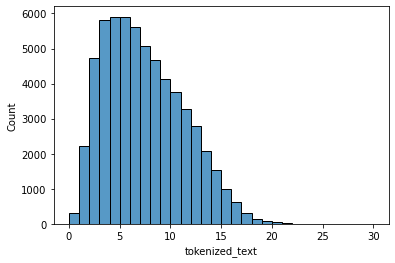

In [46]:
sns.histplot(data = df['tokenized_text'].apply(len), bins = 30)

In [47]:
word_dict = {}

In [48]:
for i in df['tokenized_text']:
    for word in i:
        if word in word_dict:
            word_dict[word] += 1
        else:
            word_dict[word] = 1  

In [49]:
words_ordered = sorted(word_dict.items(), key=lambda x: x[1], reverse=True)

In [50]:
len(word_dict)

39161

In [51]:
def get_occurances(num = 20):
    x_vals = []
    y_vals = []
    for i in enumerate(words_ordered):
        val = i[0]
        words = i[1]
        x_vals.append(words[0])
        y_vals.append(words[1])
        if (val == num):
            return x_vals, y_vals

In [52]:
occur_20 = get_occurances()

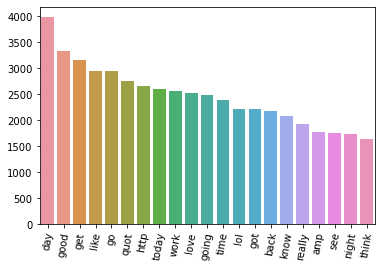

In [53]:
#Most common words
ax = sns.barplot(x = occur_20[0], y = occur_20[1])
ax = ax.set_xticklabels(ax.get_xticklabels(),rotation = 80)

In [54]:
most_ocurring = get_occurances(num=800)

In [55]:
most_ocurring[1][800]

78

In [56]:
tokenized_tweet = df['tokenized_text']

In [57]:
tokenized_tweet

1307018                            [outhouse, used, purpose]
1004419                                  [curry, best, ever]
788888     [morning, think, gmail, abandoned, sm, text, m...
963563     [good, morning, definitely, foundation, build,...
191483     [dear, twitter, world, taco, nacho, good, soun...
                                 ...                        
160466     [well, got, home, tmw, 530p, comcast, right, d...
35081      [grrr, couldnt, henry, school, today, sooooo, ...
1069630                                   [hey, back, going]
1217564                                                   []
17483      [seriously, trip, going, planned, wanna, fun, ...
Name: tokenized_text, Length: 60000, dtype: object

In [60]:
X=df.text
y=df.target

NameError: name 'data' is not defined

In [91]:
X_train=df.text
Y_train =df.target
X_test = df_test.text
Y_test = df_test.target


In [92]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(X)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  388394


/Users/kunalkapur/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [93]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78     14994
           4       0.78      0.76      0.77     15006

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000



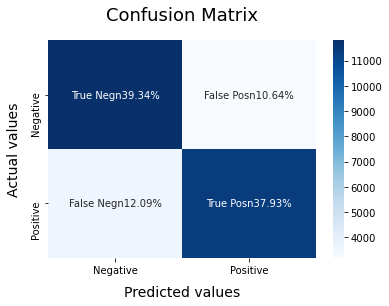

In [94]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, Y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

              precision    recall  f1-score   support

           0       0.76      0.79      0.78     14994
           4       0.78      0.76      0.77     15006

    accuracy                           0.77     30000
   macro avg       0.77      0.77      0.77     30000
weighted avg       0.77      0.77      0.77     30000



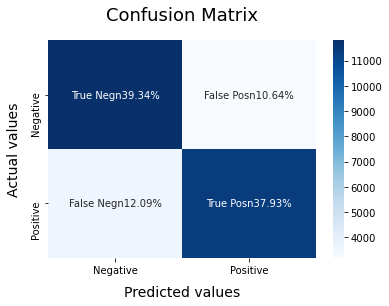

In [111]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, Y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

In [115]:
df_test['pred'] = y_pred1

In [116]:
df_test['val'] = df_test['pred'] == df_test['target']

In [119]:
df_test.head()

,target,text,text_len,tokenized_text,pred,val
1454731,4,@luckeyme Thanks Tim - it's pretty similar to ...,94,"[thanks, tim, pretty, similar, looking, started]",4,True
993437,4,eat you DINNER guys..,22,"[eat, dinner, guy]",4,True
530154,0,@queenofpr Its no problem. Give me a call when...,121,"[problem, give, call, get, chance, way, sorry,...",0,True
373575,0,My little boo is sick,22,"[little, boo, sick]",0,True
866790,4,2 hours of jogging ... cant feel my legs ... b...,65,"[2, hour, jogging, cant, feel, leg, dam, feel,...",0,False


In [123]:
df_test['val'].value_counts()

True     23180
False     6820
Name: val, dtype: int64